In [2]:
import pandas as pd
from ploev.calc import Calc
from ploev.ppt import OddsOracle
from ploev.cards import Board
from ploev.easy_range import BoardExplorer

#### Сначала присоединяемся к серверу OddsOracle ####

In [3]:
odds_oracle = OddsOracle()
calc = Calc(odds_oracle)

Successfully connected to http://localhost:40000/xmlrpc


### Попадание во флоп ###
Мы хотим посмотреть, как часто (и как сильно) префлоп диапазоны попадают в определенные флопы. 
Для этого нам нужно задать:
1. Префлоп диапазоны
2. Поддиапазоны попадания во флоп (для разных типов флопов они будут разные), например
  * Strong
  * Good
  * Medium
  * Weak
3. Разные флопы (в этом примере будет только один флоп)

#### Задаем начальные условия

In [4]:
# Префлоп диапазоны (используем сохранненные диапазоны PokerJuice)
main_ranges = ['$FI12', '$FI20', '$FI25', '$FI30', '$FI40', '$FI50', 
               '$3b4i', '$3b6i', '$3b8i', '$3b10i', '$3b12i', '$3b15i',
               '$3b4o', '$3b6o', '$3b8o', '$3b10o', '$3b12o', '$3b15o',]

# Поддиапазоны попадания во флоп в формате easy_range
sub_easy_ranges = [
    'MS+, SD16_16+, (T2P+):(SD8_8+), (TP,MP,BP,OP3+):SD12_12+',
    'T2P+, SD12_12+, (2P+):(SD8+), (TP,MP,BP,OP3+):SD12+',
    'TP,OP4+, SD8_8+',
    '*',
]

# Флоп
flop = '9d8s2h'

# Переводим поддиапазоны в формат PPT с помощью easy_range.BoardExplorer
board_explorer = BoardExplorer(Board.from_str(flop))
sub_ranges = [board_explorer.ppt(sub_easy_range) for sub_easy_range in sub_easy_ranges]

In [5]:
matching = [] # В этом list'e будут храниться проценты попадания каждого диапазона

#### Функция, которая обращается к OddsOracle, чтобы получить проценты попадания

In [6]:
def get_matching(board, main_range, sub_ranges):
    return calc.range_distribution(main_range, sub_ranges, board, equity=False)

#### В цикле для каждого префлоп диапазона получам проценты попадания

In [7]:
for main_range in main_ranges:
    calc_results = get_matching(flop, main_range, sub_ranges)
    fractions = [round(calc_result.fraction * 100) for calc_result in calc_results]
    matching.append(fractions)

#### Создаем pandas.DataFrame из нашего list'а

Это нужно только для удобства. Этот DataFrame аккуратно отображается в блокноте, из него можно быстро сделать разные графики, его можно легко экспортировать в разные форматы (CVS, excel...) и т.д

In [8]:
columns = ['Strong', 'Good', 'Medium', 'Weak']
df = pd.DataFrame.from_records(matching, columns=columns, index=main_ranges)

#### Вот результат

In [9]:
df

,Strong,Good,Medium,Weak
$FI12,4,9,66,21
$FI20,4,8,56,32
$FI25,4,8,51,36
$FI30,4,8,49,39
$FI40,4,8,44,45
$FI50,4,8,42,47
$3b4i,3,7,83,7
$3b6i,5,17,65,14
$3b8i,5,15,58,22
$3b10i,5,13,54,28


### Несколько графиков

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

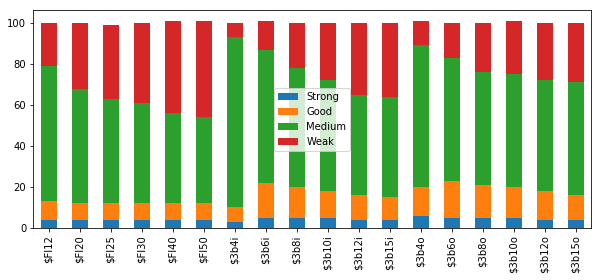

In [11]:
df.plot(kind='bar',stacked='True', figsize=(10, 4))

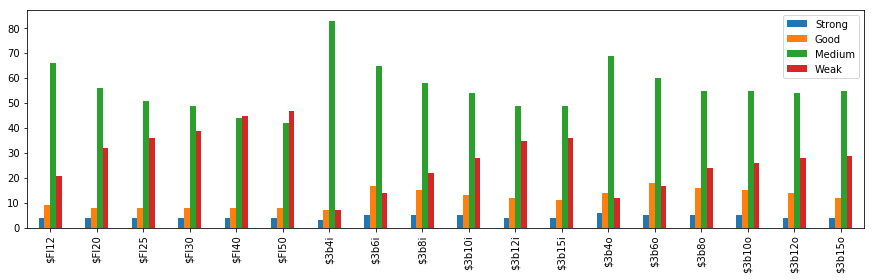

In [12]:
df.plot(kind='bar', figsize=(15, 4))

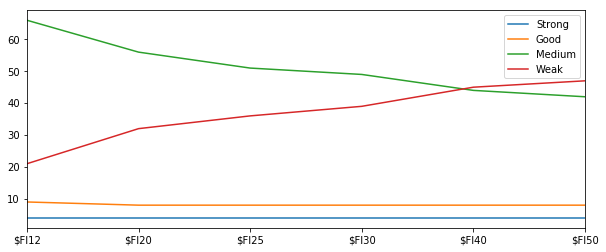

In [13]:
df[:6].plot(figsize=(10, 4)) # Только для $FI

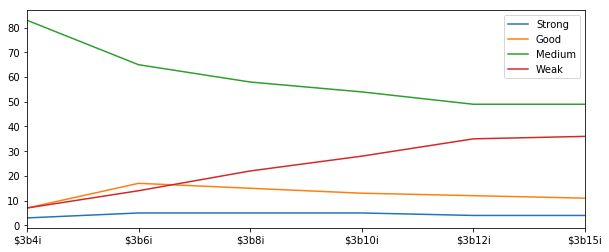

In [14]:
df[6:12].plot(figsize=(10, 4)) # Только для $3bi